### Kmeans Clustering

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [94]:
# Distance definitions
def minkowski(a, b, p=3):
    return np.sum(np.abs(a - b) ** p, axis=-1) ** (1 / p)
def manhattan(a, b):
    return minkowski(a, b, 1)
def euclidean(a, b):
    return minkowski(a, b, 2)

In [95]:
def KMC(df, k=3, f=euclidean):
    centroids = df.sample(k).to_numpy()
    clusters = np.zeros(df.shape[0], dtype=np.uint)

    for _ in range(100):
        for i, row in enumerate(df.to_numpy()):
            distances = f(centroids, row)
            clusters[i] = np.argmin(distances)

        for i in range(k):
            centroids[i] = df[clusters == i].mean().to_numpy()
    
    SSE = sum(
        f(point, clusters[i])
        for i, point in enumerate(df.to_numpy())
    )
    return clusters, centroids, SSE

In [96]:
path = "data/data10.csv"
df = pd.read_csv(path)
df.head()

,points,assists,rebounds
0,18.0,3.0,15
1,19.0,4.0,14
2,14.0,5.0,10
3,14.0,4.0,8
4,11.0,7.0,14


In [97]:
KMC(df)

(array([0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 0, 1], dtype=uint64),
 array([[16.42857143,  6.57142857, 11.42857143],
        [29.5       , 11.16666667,  6.33333333],
        [27.8       ,  4.8       ,  7.4       ]]),
 np.float64(469.7475890679564))

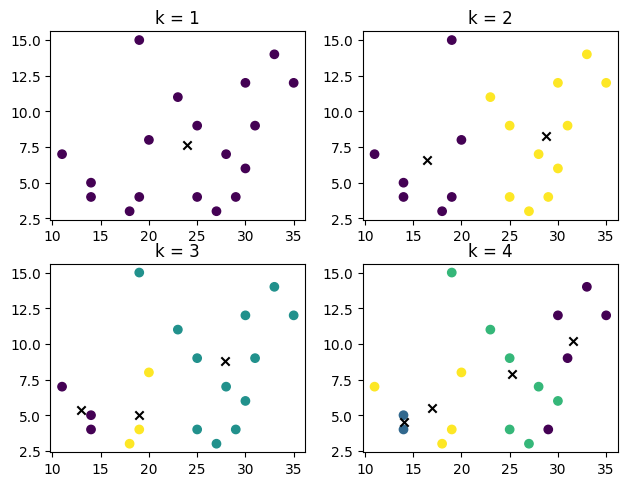

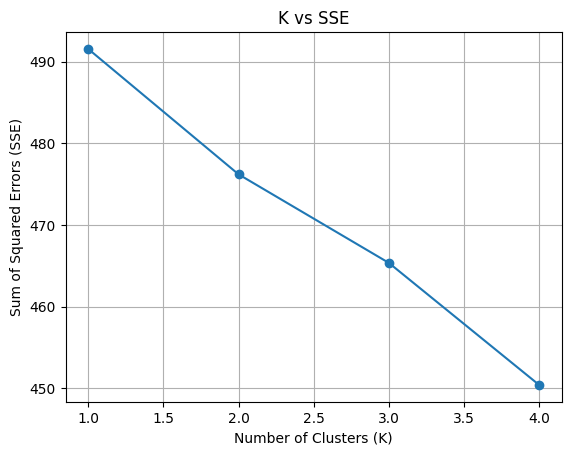

In [98]:
def plot_clusters(data, clusters, centroids, k, ax):
    ax.set_title(f'k = {k}')
    ax.scatter(data.iloc[:, 0], data.iloc[:, 1], c=clusters)
    ax.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='x')

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.tight_layout()

SSE_list = []
for k in range(1, 5):
    clusters, centroids, sse = KMC(df, k)
    SSE_list.append(sse)
    plot_clusters(df, clusters, centroids, k, axes[(k - 1) // 2, (k - 1) % 2])

plt.figure()
plt.plot(range(1, 5), SSE_list, marker='o')
plt.title('K vs SSE')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.grid()
plt.show()